In [1]:
import os
import glob
from Bio import SeqIO
from tqdm.auto import tqdm
import pylev
import matplotlib.pyplot as plt
import numpy as np
import copy

## Load all the unique sequences
These are the results for searching a database for homologues of:
- thioamide
- macroamidine
- azoline

#### Alternatively, Load the Interpro database sequences 

In [2]:
seqdump_dirs = glob.glob("../**/**seqdump.fa",recursive = True)

unique_sequence_ids = []
unique_sequences = []
num_sequences = 0
seqrecs_list = []
selected_seqdump_dirs = []
for seqdump_dir in seqdump_dirs:
    seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    print(f"{seqdump_dir} has {len(seqrecs)} sequences")
    seqrecs_list.append(seqrecs)
    #Me removing certain files
    if ("Lasso" in seqdump_dir):
        selected_seqdump_dirs.append(seqdump_dir)

seqdump_dirs = selected_seqdump_dirs
#End of me removing certain files

for i in tqdm(range(len(seqdump_dirs)), desc='Loading all sequences'):
    seqrecs = seqrecs_list[i]
    seqdump_dir = seqdump_dirs[i]
    YcaO_type = seqdump_dir.split("/")[-3]
    YcaO_subclass = seqdump_dir.split("/")[-2]
    #print(YcaO_type,YcaO_subclass)
    for seqrec in seqrecs[:]:
        num_sequences += 1
        if seqrec.id not in unique_sequence_ids and num_sequences % 5 == 0:
            unique_sequence_ids.append(seqrec.id)
            #seqrec.id = f"{YcaO_type}_{YcaO_subclass}_{seqrec.id}"
            unique_sequences.append(seqrec)
            

# '''OVERWRITING UNIQUE SEQUENCES FOR SPEED OF PROCESSING'''
# unique_sequences = [seqrec for seqrec in SeqIO.parse("../raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa","fasta")]     
print(f'From {num_sequences} searched sequences {len(unique_sequences)} are unique. Loaded in unique_sequences variable.')


"""THIS SECTION OVERWRITES THE SEQUENCES ABOVE WITH ONLY THE INTERPRO SEQUENCES, WHICH ARE CONFIRMED YCAO DOMAIN
    
    ALSO, PLEASE NOTE THAT THE ABOVE CODE, DOES NOT FILTER FOR SEQUENCES LATER DEEMED TO BE BAD 
    (aka: folder named "MAY_BE_WRONG...")
"""
interpro_seqrecs_dir = "../raw_sequences/interpro_all_YcaO_domain_sequences.txt"
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
filtered_interpro = []
for i in range(0,len(interpro_seqrecs)):
    if(i%1 == 0):
        filtered_interpro.append(interpro_seqrecs[i])

print(f"There are {len(filtered_interpro)} Interpro Sequences")

#Remove this line if you want to use my own sequences rather than the ones from interpro
unique_sequences = filtered_interpro

../raw_sequences/Amidine/Lasso_peptides_SEQUENCE_MAY_BE_WRONG/HMMER_seqdump.fa has 1665 sequences
../raw_sequences/Amidine/Jesko_but_unknown/HMMER_seqdump.fa has 14 sequences
../raw_sequences/Amidine/Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT/outgroup_sequence_HMMER_seqdump.fa has 1779 sequences
../raw_sequences/Amidine/Bottromycin/HMMER_seqdump.fa has 273 sequences
../raw_sequences/Unknown/EcYcaO/HMMER_seqdump.fa has 832 sequences
../raw_sequences/Azoline/Muscoride/HMMER_seqdump.fa has 1821 sequences
../raw_sequences/Azoline/Azolemycins_SEQUENCE_MAY_BE_WRONG/HMMER_seqdump.fa has 1395 sequences
../raw_sequences/Azoline/Cyanobactins_TruD/TruD_HMMER_seqdump.fa has 1858 sequences
../raw_sequences/Azoline/Sag/HMMER_seqdump.fa has 576 sequences
../raw_sequences/Azoline/Mccb17_SEQUENCE_MAY_BE_WRONG/HMMER_seqdump.fa has 13 sequences
../raw_sequences/Azoline/Thiostrepton/HMMER_seqdump.fa has 1205 sequences
../raw_sequences/Azoline/PZN_SEQUENCE_MAY_BE_WRONG/HMMER_seqdu

Loading all sequences:   0%|          | 0/1 [00:00<?, ?it/s]

From 1665 searched sequences 333 are unique. Loaded in unique_sequences variable.
There are 16431 Interpro Sequences


## Load unique sequences from interpro set rather than just my collected sequences (currently lacking Lasso and azolemycin sequences) 

Interpro sequences have been renamed by my annotated sequences

In [3]:
seqdump_dirs = glob.glob("../**/**seqdump.fa",recursive = True)
seqdump_dirs.sort()
interpro_seqrecs_dir = "../raw_sequences/interpro_all_YcaO_domain_sequences.txt"

all_sequences = {}

#Get all the interpro sequences
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
interpro_ids = [seqrec.id for seqrec in interpro_seqrecs]
interpro_ids_processed = [seq_id.split("|")[0] for seq_id in interpro_ids]
interpro_size = len(interpro_seqrecs)

for seqdump_dir in seqdump_dirs:
    
    YcaO_type = seqdump_dir.split("/")[-3]
    YcaO_subclass = seqdump_dir.split("/")[-2]
    YcaO_name = f"{YcaO_type}_{YcaO_subclass}"
    
    seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    
    pos_in_file = 0
    
    interpro_seqs = []
    non_interpro_seqs = []
    
    all_sequences[YcaO_name] = {}
    
    for seqrec in seqrecs:
        pos_in_file += 1
        seqrec.type = f"{YcaO_name}_{pos_in_file}"
        seqrec.pos_in_file = pos_in_file
        accession_code = seqrec.id.split("_")[0]
        seqrec.accession_code = accession_code
        if(accession_code in interpro_ids_processed):
            interpro_seqs.append(seqrec)
        else:
            non_interpro_seqs.append(seqrec)
            
    all_sequences[YcaO_name]["seqrecs"] = seqrecs
    all_sequences[YcaO_name]["interpro"] = interpro_seqs
    all_sequences[YcaO_name]["non_interpro"] = non_interpro_seqs
    
    print(f"{YcaO_name} has {len(seqrecs)} sequences, {len(interpro_seqs)}/{len(non_interpro_seqs)} are in/out the Interpro Database, ")

    
good_YcaO_names = [
    "Amidine_Bottromycin",
    "Amidine_Jesko_but_unknown",
    "Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT",
    "Azoline_Bottromycin",
    "Azoline_Cyanobactins_PatD",
    "Azoline_Cyanobactins_TruD",
    "Azoline_Goadsporin",
    "Azoline_Heterocycloanthracins",
    "Azoline_Mccb17_SEQUENCE_MAY_BE_WRONG",
    "Azoline_Muscoride",
    "Azoline_PZN_updated",
    "Azoline_Sag",
    "Azoline_Thiopeptide_Lactazole",
    "Azoline_Thiostrepton",
    "Thioamide_Jesko",
    "Thioamide_Jesko2",
    "Thioamide_McrA_thioamidation_YcaO",
    "Thioamide_Thioholgamide",
    "Thioamide_Thioviridamide",
    "Unknown_EcYcaO",
]

#Process Interpro sequences such that they no longer have those horrendously massive IDs, #just the accession number
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
interpro_ids = [seqrec.id for seqrec in interpro_seqrecs]
interpro_ids_processed = [seq_id.split("|")[0] for seq_id in interpro_ids]

for i in range(0,len(interpro_seqrecs)):
    """
        Changing the naming scheme of the sequences, so that they are so long, >>> ACCESSIONCODE:start-end 
        eg: A0A009ENJ8:159-573 
    """
    pos_string = interpro_seqrecs[i].id.split("(")[1].split(")")[0].replace("...","-")
    interpro_seqrecs[i].id = interpro_seqrecs[i].id.split("|")[0] + ":" + pos_string
    interpro_seqrecs[i].domain_pos = pos_string
    """
         CUTTING THE SEQUENCES DOWN TO BE ONLY THE YCAO DOMAIN +20 AAs either side
    """
    start = int(pos_string.split("-")[0])
    end = int(pos_string.split("-")[1])
    seq_len = len(interpro_seqrecs[i].seq)
    #original_seq = copy.deepcopy(interpro_seqrecs[i].seq)
    interpro_seqrecs[i].seq = interpro_seqrecs[i].seq[max(0,start-20):min(seq_len+20, end)]
    #print(pos_string,start,end)
    #print(f"Original Sequence: \n{original_seq}\n\nYcaO Sequence:\n{interpro_seqrecs[i].seq}\n")
    #print_alignment(interpro_seqrecs[i].seq,original_seq)
    #print(interpro_seqrecs[i].id)
    #break
    
    
#for YcaO_name in good_YcaO_names:
for YcaO_name in good_YcaO_names:
    for seqrec in all_sequences[YcaO_name]["interpro"]:
        index = interpro_ids_processed.index(seqrec.accession_code)
        #print(seqrec.accession_code, interpro_seqrecs[index].id)
        interpro_seqrecs[index].id = seqrec.type + "_" + interpro_seqrecs[index].id
        #print(interpro_seqrecs[index].id)
        #break
    #for seqrec in all_sequences[YcaO_name]["non_interpro"]:
    #    seqrec.id = seqrec.type + "_" + seqrec.id
    #    interpro_seqrecs.append(seqrec)


for seqrec in interpro_seqrecs:
    seqrec.description = ""
    seqrec.name = ""

unique_sequences = interpro_seqrecs
    
# filtered_interpro = []
# for i in range(0,len(interpro_seqrecs)):
#     if(i%5 == 0):
#         filtered_interpro.append(interpro_seqrecs[i])
        
# unique_sequences = filtered_interpro
print(f"\nThere were {interpro_size} sequences in the interpro database, we have added our ones, making it now {len(interpro_seqrecs)}")
print(f"\nThere are now {len(unique_sequences)} unique sequences")

Amidine_Bottromycin has 273 sequences, 263/10 are in/out the Interpro Database, 
Amidine_Jesko_but_unknown has 14 sequences, 14/0 are in/out the Interpro Database, 
Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT has 1779 sequences, 1695/84 are in/out the Interpro Database, 
Amidine_Lasso_peptides_SEQUENCE_MAY_BE_WRONG has 1665 sequences, 0/1665 are in/out the Interpro Database, 
Azoline_Azolemycins_SEQUENCE_MAY_BE_WRONG has 1395 sequences, 1/1394 are in/out the Interpro Database, 
Azoline_Bottromycin has 5 sequences, 0/5 are in/out the Interpro Database, 
Azoline_Cyanobactins_PatD has 1854 sequences, 1731/123 are in/out the Interpro Database, 
Azoline_Cyanobactins_TruD has 1858 sequences, 1732/126 are in/out the Interpro Database, 
Azoline_Goadsporin has 1750 sequences, 1644/106 are in/out the Interpro Database, 
Azoline_Heterocycloanthracins has 1740 sequences, 1660/80 are in/out the Interpro Database, 
Azoline_Mccb17_SEQUENCE_MAY_BE_WRONG has 13 sequence

In [4]:
print(interpro_seqrecs[15000].id)

C5BBS6:11-432


## Remove sequences that are too short to be considered YcaO or too long to be useful
# <center> A.K.A len > 700 or len < 300 </center>

From 16431 unique sequences. 14640 remain after processing

Distribution of all sequences prior to sanity filtering


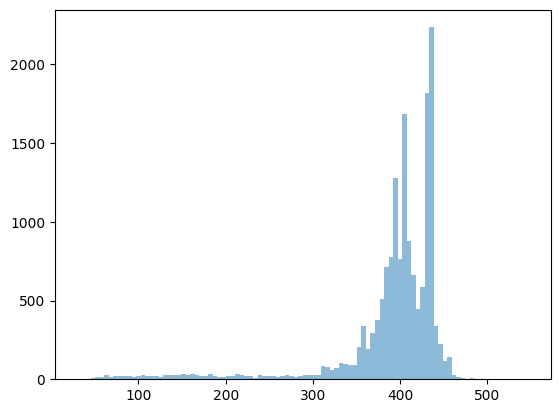

Distribution of all sequences after  sanity filtering


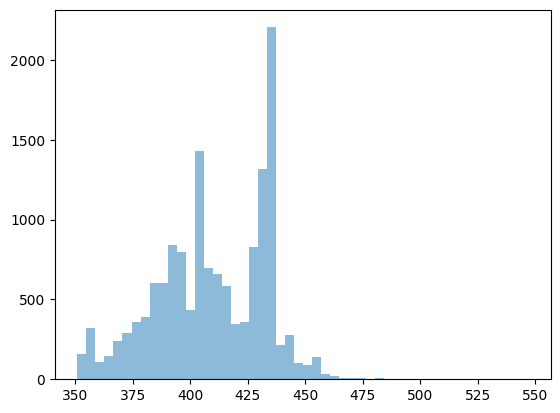

In [5]:
filtered_sequences = []
sizes = []
post_filter_sizes = []

for seq_rec in unique_sequences:
    sizes.append(len(seq_rec.seq))
    if(len(seq_rec.seq)<1000 and len(seq_rec.seq)>350):
        filtered_sequences.append(seq_rec)
        post_filter_sizes.append(len(seq_rec.seq))
        
        
print(f'From {len(unique_sequences)} unique sequences. {len(filtered_sequences)} remain after processing\n')

print("Distribution of all sequences prior to sanity filtering")
plt.hist(sizes, bins=100, alpha=0.5, label='sequence lengths')
plt.show()

print("Distribution of all sequences after  sanity filtering")
plt.hist(post_filter_sizes, bins=50, alpha=0.5, label='sequence lengths')
plt.show()

## Save unique sequences to file for intermediate bash processing

In [8]:
file_dir = './../processed_sequences/'
unique_seq_fp = os.path.join(file_dir, "unique_unaligned_sequences.txt")
SeqIO.write(filtered_sequences, unique_seq_fp, "fasta")

14640

## Remove Sequences with High Similarity using CD-HIT eg. 90% or 70% identity etc

In [22]:
identity_percentage = 0.4
filtered_by_identity_unique_seq_fp = os.path.join(file_dir, f"unique_filtered_{identity_percentage}_sequences.txt")

!./../external_scripts/cd-hit-v4.8.1-2019-0228/cd-hit -i $unique_seq_fp -o $filtered_by_identity_unique_seq_fp -c $identity_percentage -n 2 -d 0 -T 8 -M 16000

num_sequences = len([seq.id for seq in SeqIO.parse(filtered_by_identity_unique_seq_fp,"fasta")])
print(f"Started with {len(filtered_sequences)} sequences, after removing those with >{identity_percentage*100}% identity, we have {num_sequences} sequences!")
print(f"Saved as {filtered_by_identity_unique_seq_fp}")

Program: CD-HIT, V4.8.1 (+OpenMP), Dec 12 2022, 14:05:50
Command: ./../external_scripts/cd-hit-v4.8.1-2019-0228/cd-hit
         -i
         ./../processed_sequences/unique_unaligned_sequences.txt
         -o
         ./../processed_sequences/unique_filtered_0.4_sequences.txt
         -c 0.4 -n 2 -d 0 -T 8 -M 16000

Started: Thu Dec 22 23:06:00 2022
                            Output                              
----------------------------------------------------------------
total seq: 14640
longest and shortest : 547 and 351
Total letters: 5994667
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 8M
Buffer          : 8 X 10M = 86M
Table           : 2 X 0M = 0M
Miscellaneous   : 0M
Total           : 95M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 1988053823

# comparing sequences from          0  to       1464
.---------- new table with       46 representatives
# comparing se

## Compute aligned sequences using mafft

In [23]:
aligned_unique_seq_fp = os.path.join(file_dir, f"aligned_{identity_percentage}_identity_sequences.txt")

!mafft --auto --distout $filtered_by_identity_unique_seq_fp > $aligned_unique_seq_fp 

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 102 ambiguous characters.
 7401 / 7437
done.

Constructing a UPGMA tree (efffree=0) ... 
 7430 / 7437
done.

Progressive alignment 1/2... 
STEP  5501 / 7436 
Reallocating..done. *alloclen = 2123
STEP  6701 / 7436 
Reallocating..done. *alloclen = 3161
STEP  6801 / 7436 
Reallocating..done. *alloclen = 4204
STEP  7001 / 7436  h
Reallocating..done. *alloclen = 5540
STEP  7301 / 7436  h
Reallocating..done. *alloclen = 7233
STEP  7401 / 7436 
done.

Making a distance matrix from msa.. 
 7400 / 7437
done.

Constructing a UPGMA tree (efffree=1) ... 
 7430 / 7437
done.

Progressive alignment 2/2... 
STEP  5401 / 7436 
Reallocating..done. *alloclen = 2105
STEP  7301 / 7436  h
Reallocating..done. *alloclen = 3418

Reallocating..done. *alloclen = 4435

Reallocating..done. *alloclen = 5711
STEP  7401 / 7436  h
Reallocating..done. *allo

In [24]:
aligned_sequences = [seqrec for seqrec in SeqIO.parse(aligned_unique_seq_fp,"fasta")]
print(f"Aligned sequences have a length of {len(aligned_sequences[0].seq)} AAs")

Aligned sequences have a length of 5243 AAs


In [8]:
aligned_sequences = [seqrec for seqrec in SeqIO.parse(aligned_unique_seq_fp,"fasta")]
print(f"Aligned sequences have a length of {len(aligned_sequences[0].seq)} AAs")

Aligned sequences have a length of 5030 AAs


In [ ]:
asr = False
redo = True

redo_text = "-redo"
asr_text = "-asr"

print(f"CREATING TREE, Redoing? {redo}; Running ASR? {asr}")
!iqtree2 -s $aligned_unique_seq_fp {(redo_text if redo else "")} -T 47 -m Q.pfam+F+R4 -B 1000 {(asr_text if asr else "")}

CREATING TREE, Redoing? True; Running ASR? False
IQ-TREE multicore version 2.2.0 COVID-edition for Linux 64-bit built Jun  1 2022
Developed by Bui Quang Minh, James Barbetti, Nguyen Lam Tung,
Olga Chernomor, Heiko Schmidt, Dominik Schrempf, Michael Woodhams, Ly Trong Nhan.

Host:    e345b7f22324 (AVX2, FMA3, 15 GB RAM)
Command: iqtree2 -s ./../processed_sequences/aligned_0.95_identity_sequences.txt -redo -T 7 -m Q.pfam+F+R4 -B 1000
Seed:    270229 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Thu Dec 22 21:40:33 2022
Kernel:  AVX+FMA - 7 threads (8 CPU cores detected)

Reading alignment file ./../processed_sequences/aligned_0.95_identity_sequences.txt ... Fasta format detected
Reading fasta file: done in 0.695841 secs using 91.88% CPU
Alignment most likely contains protein sequences
Constructing alignment: done in 0.713331 secs using 90.47% CPU
Alignment has 7437 sequences with 5243 columns, 4833 distinct patterns
2818 parsimony-informative, 1172 singleton sites, 1

Thioamide_Thioviridamide_429_Thioamide_Thioholgamide_454_Thioamide_McrA_thioamidation_YcaO_454_Thioamide_Jesko2_413_Thioamide_Jesko_388_Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_1638_A0A7I9VGR9:23-385 -> Thioamide_Thioviridamide_429_Thioamide_Thioholgamide_454_Thioamide_McrA_thioamidation_YcaO_454_Thioamide_Jesko2_413_Thioamide_Jesko_388_Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_1638_A0A7I9VGR9_23-385
A0A7J0A791:58-435 -> A0A7J0A791_58-435
A0A7J0BII5:20-427 -> A0A7J0BII5_20-427
Thioamide_Thioholgamide_1689_Thioamide_McrA_thioamidation_YcaO_1689_Thioamide_Jesko2_1500_Azoline_Muscoride_1250_Azoline_Goadsporin_1616_Azoline_Cyanobactins_TruD_1371_Azoline_Cyanobactins_PatD_1158_A0A7J0BPZ8:20-427 -> Thioamide_Thioholgamide_1689_Thioamide_McrA_thioamidation_YcaO_1689_Thioamide_Jesko2_1500_Azoline_Muscoride_1250_Azoline_Goadsporin_1616_Azoline_Cyanobactins_TruD_1371_Azoline_Cyanobactins_PatD_1158_A0A7J0BPZ8_20-427
Azoline_PZ

                                                                                                                                                                                                                                                                Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 0.138354 secs using 620.7% CPU
   1  A0A009ENJ8_159-573                                                                                                                                                                                                                                               91.72%    failed      0.02%
   2  A0A009H7D2_159-573                                                                                                                                                                                                                                               91.72%    failed      0.00%
   3  Thioamide_Thioviridamide_4_Thioamide_Thioholgamide_94_Thioam

 459  A0A0K6I981_120-486                                                                                                                                                                                                                                               92.64%    failed      0.00%
 460  A0A0K6ILW3_159-569                                                                                                                                                                                                                                               91.80%    failed      0.01%
 461  Unknown_EcYcaO_663_A0A0K8JHY2_15-437                                                                                                                                                                                                                             91.67%    failed      0.00%
 462  Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_1678_A0A0K8P0S3_166-516                     

2196  A0A1V4Y384_393-757                                                                                                                                                                                                                                               92.68%    failed      0.04%
2197  A0A1V4YJ23_23-425                                                                                                                                                                                                                                                91.95%    failed      0.00%
2198  A0A1V4YN59_19-396                                                                                                                                                                                                                                                92.45%    failed      0.00%
2199  A0A1V4YU21_20-396                                                                                                        

4026  Azoline_PZN_updated_1650_Azoline_Heterocycloanthracins_1614_Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_1618_A0A3Q8VIA2_57-458                                                                                                  91.97%    failed      0.00%
4027  A0A3Q8WAA0_249-636                                                                                                                                                                                                                                               92.24%    failed      0.00%
4028  A0A3Q8WCD3_209-593                                                                                                                                                                                                                                               92.29%    failed      0.00%
4029  A0A3Q8XZR0_56-409                                                                                                        

5892  A0A7L7YYI5_52-458                                                                                                                                                                                                                                                91.87%    failed      0.00%
5893  A0A7L7YYL4_64-444                                                                                                                                                                                                                                                92.37%    failed      0.00%
5894  A0A7L8RMX7_12-423                                                                                                                                                                                                                                                91.93%    failed      0.15%
5895  A0A7L8V881_9-414                                                                                                         

Checking for duplicate sequences: done in 0.227408 secs using 397.9% CPU



## Find redundant sequences to save compute

In [68]:
def pairwise_sequence_identity(seq_rec_1, seq_rec_2):
    seq_1 = str(seq_rec_1.seq)
    seq_2 = str(seq_rec_2.seq)
    
    num_matching = 0
    length = 0
    for i in range(len(seq_1)):
        if seq_1[i] == '-' and seq_2[i] == '-':
            continue
        if seq_1[i] == seq_2[i]:
            num_matching += 1
        length += 1
    return num_matching/length
seq_1, seq_2 = aligned_sequences[:2]
print(f'Sequence identity test between\nseq 1: {str(seq_1.seq)[:200]}...\nand\nseq 2: {str(seq_2.seq)[:200]}...')
identity_similarity = pairwise_sequence_identity(seq_1, seq_2)
print(f'Identity similarity = {identity_similarity}')

Sequence identity test between
seq 1: --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------...
and
seq 2: --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------...
Identity similarity = 0.9601769911504425


In [ ]:
redundant_sequences = set()
threshold = 0.7 # anything above 70% identity to the current seq will be filtered out

print(type(enumerate(aligned_sequences)))
# pbar = tqdm(enumerate(aligned_sequences), desc='Filtering sequences', total=len(aligned_sequences))
# for i, sequence in pbar:
#     if i in redundant_sequences:
#         continue
#     comparison_sequences = [(seq, j) for j, seq in enumerate(aligned_sequences) if j != i and j not in redundant_sequences]
#     for comp_seq, comp_seq_idx in comparison_sequences:
#         identity_similarity = pairwise_sequence_identity(sequence, comp_seq)
#         if identity_similarity > threshold: # if above threshold, then flag as redundant
#             redundant_sequences.add(comp_seq_idx)
#             pbar.set_description(f'Filtering sequences, found {len(redundant_sequences)} redundant')
# #             print(f'Found {i} has redundant sequence with {identity_similarity*100:.2f}% similarity.')
# #             print(f'We have {len(redundant_sequences)} redundant sequences.')

In [57]:
filtered_sequences = [seq for i, seq in enumerate(aligned_sequences) if i not in redundant_sequences]

100%|██████████| 45/45 [00:00<00:00, 132.32it/s]


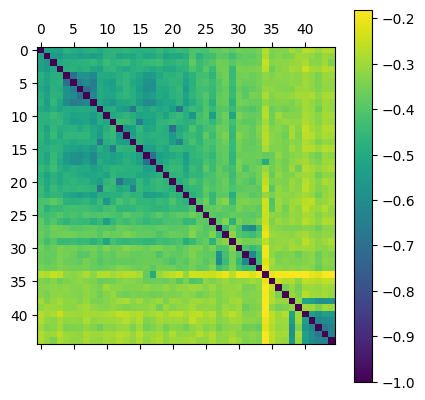

In [62]:
similarity_matrix = []

for i in tqdm(range(len(filtered_sequences))):
    row = []
    for j in range(len(filtered_sequences)):
        similarity = pairwise_sequence_identity(filtered_sequences[i], filtered_sequences[j])
        row.append(similarity)
    similarity_matrix.append(row)

m = np.array(similarity_matrix)
plt.matshow(-m)
plt.colorbar()

In [54]:
redundant_sequences

{1,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 17,
 18,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 39,
 41,
 42,
 44,
 48,
 49,
 50,
 51,
 52,
 55,
 56,
 57,
 58,
 62,
 63,
 64,
 65,
 67,
 70,
 72,
 81,
 85,
 91,
 92,
 96,
 97,
 98}

In [30]:
len(aligned_sequences)

999